# Assignment 6

## Try to submit as an HTML file

<font size = "5">
Print your Emory code below

In [1]:
# Write your answer here:
print("2577545")


2577545


<font size = "5">

Import the "pandas", "matplotlib.pyplot", "numPy" and "statsmodels.formula.api" libraries

In [59]:
# Write your answer here:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.formula.api as smf



<font size = "5">

(a) Functions

<font size = "3">

- Read the dataset labelled features.csv.
- Create a ``` lambda ``` function that checks if horsepower $>$ 100
- Create a new list that shows true if horsepower $>$ 100 and false <br>
if horsepower $\leq$ 100.
- Count how many cars have horsewpower $> 100$.

To get full credit use either the apply or the map function <br>
(see Lectures 7 and 8)

In [50]:
# Write your answer here

features = pd.read_csv("Data/features.csv")
pd.read_csv("Data/features.csv")

features['horsepower'] = pd.to_numeric(features['horsepower'], errors='coerce')

fn_horsepower = lambda horsepower: horsepower > 100

high_horsepower = features["horsepower"].apply(fn_horsepower)

high_horsepower.sum()


150

<font size = "5">

(b) Subsetting Data

<font size = "3" >

- Read the dataset labelled features.csv.
- Define a global variable called ```threshold``` that takes the <br>
value 3000
- Subset the data to get one dataset with weight $>$ threshold and <br>
another with weight $\le$ 3000. Use the ```.query()``` function.
- Compute the mean acceleration for each of these datasets.<br>

Note: Review how to define a gloabl variable inside ```.query()```
 

In [57]:
# Write your answer here:
features = pd.read_csv("Data/features.csv")
pd.read_csv("Data/features.csv")

threshold = 3000

over_threshold = features.query('weight > @threshold')
under_threshold = features.query('weight <= @threshold')

over_acceleration = over_threshold['acceleration'].mean()
under_acceleration = under_threshold['acceleration'].mean()


16.202173913043477

<font size = "5">

(c) Regression

<font size = "3">

In this exercise you are asked to plot acceleration vs. weight and to plot <br>
 the best fit line.

- Run a linear regression between acceleration and weight.
- Extract the intercept and coefficient.
- Using your predicted coefficients, compute the predicted value of acceleration
- Plot a scatter plot with acceleration on the y axis and weight on the x axis.
- On that same figure, plot a line with the predicted values of acceleration

Do not forget to label your axes and title.

Intercept    19.606158
weight       -0.001359
dtype: float64


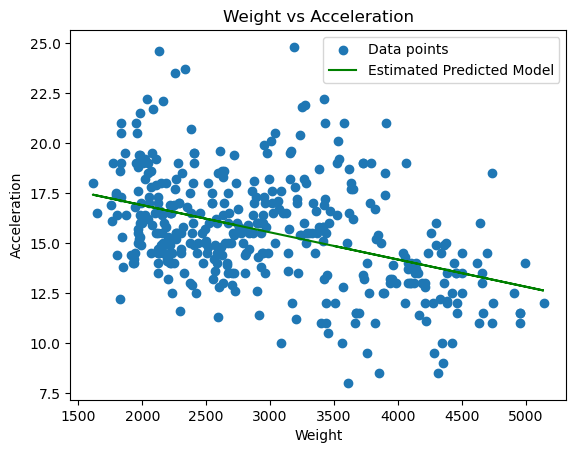

In [65]:
# Write your answer here:
model = smf.ols(formula = 'acceleration ~  weight', data = features)
results = model.fit()
b_list = results.params
print(b_list)

features["p_estimated"] = b_list[0] + b_list[1]  * features["weight"]

plt.scatter(x = features["weight"],y = features["acceleration"])
plt.plot(features["weight"],features["p_estimated"], color = 'green')

plt.legend(labels = ["Data points","Estimated Predicted Model"])
plt.xlabel("Weight")
plt.ylabel("Acceleration")
plt.title("Weight vs Acceleration")
plt.show()



<font size = "5">

(d) Use sorting + ".iloc[]"

<font size = "3">

- Read the "fifa23_players_basic.csv" dataset
- Use ".sort_values()" to order the "Age" column <br>
from youngest to oldest
- Get a subset with the 5 youngest players

In [71]:
# Write your own code
fifa23 = pd.read_csv("Data/fifa23_players_basic.csv")

age_ascending = fifa23.sort_values(by='Age', ascending=True)
age_ascending.iloc[:5]



,Known As,Full Name,Overall,Potential,Value(in Euro),Positions Played,Best Position,Nationality,Image Link,Age,Height(in cm),Weight(in kg),TotalStats,BaseStats,Club Name,Wage(in Euro),Release Clause,Club Position,Contract Until,Club Jersey Number,Joined On,On Loan,Preferred Foot,Weak Foot Rating,Skill Moves,International Reputation,National Team Name,National Team Image Link,National Team Position,National Team Jersey Number,Attacking Work Rate,Defensive Work Rate
17956,A. Dithmer,Andreas Dithmer,53,76,275000,GK,GK,Denmark,https://cdn.sofifa.net/players/269/573/23_60.png,16,198,82,956,306,F.C. København,500,633000,RES,2025,41,2022,-,Right,2,1,1,-,https://cdn.sofifa.net/flags/dk.png,-,-,Medium,Medium
18014,J. Ardila,José Ardila,53,73,250000,CM,CAM,Venezuela,https://cdn.sofifa.net/players/268/892/23_60.png,16,178,70,1469,312,Estudiantes de Mérida,500,788000,SUB,2024,36,2022,-,Right,3,2,1,-,https://cdn.sofifa.net/flags/ve.png,-,-,Medium,Medium
16084,S. Ngoma,Serge Ngoma,58,82,650000,RW,RM,United States,https://cdn.sofifa.net/players/267/796/23_60.png,16,178,75,1495,340,New York Red Bulls,500,1600000,SUB,2025,22,2022,-,Right,3,2,1,-,https://cdn.sofifa.net/flags/us.png,-,-,High,Medium
11481,O. Vargas,Obed Vargas,64,81,1500000,"CM,CDM,RM",CAM,United States,https://cdn.sofifa.net/players/263/701/23_60.png,16,175,68,1660,353,Seattle Sounders FC,500,3200000,RES,2026,73,2021,-,Right,3,3,1,-,https://cdn.sofifa.net/flags/us.png,-,-,High,Medium
17591,A. Madaliński,Alan Madaliński,54,68,210000,GK,GK,Poland,https://cdn.sofifa.net/players/270/590/23_60.png,16,186,76,838,287,Miedź Legnica,500,415000,RES,2024,12,2021,-,Right,3,1,1,-,https://cdn.sofifa.net/flags/pl.png,-,-,Medium,Medium


<font size = "5">

(e) Use queries + global variables

<font size = "3">

- Read the "fifa23_players_basic.csv" dataset
- Compute the mean of the column "Value(in Euro)" <br>
and store it as a variable
- Subset the players whose value is above the mean value <br>
  using ".query()"


HINT: Remember that there is a special syntax for <br>
when the column names have spaces (see Lecture 10) <br>
Reference the column as ``` `Value(in Euro)`    ``` inside .query()

In [79]:
# Write your own code
fifa23 = pd.read_csv("Data/fifa23_players_basic.csv")

mean_value = fifa23['Value(in Euro)'].mean()
above_mean = fifa23.query("`Value(in Euro)` > @mean_value")

,Known As,Full Name,Overall,Potential,Value(in Euro),Positions Played,Best Position,Nationality,Image Link,Age,Height(in cm),Weight(in kg),TotalStats,BaseStats,Club Name,Wage(in Euro),Release Clause,Club Position,Contract Until,Club Jersey Number,Joined On,On Loan,Preferred Foot,Weak Foot Rating,Skill Moves,International Reputation,National Team Name,National Team Image Link,National Team Position,National Team Jersey Number,Attacking Work Rate,Defensive Work Rate
0,L. Messi,Lionel Messi,91,91,54000000,RW,CAM,Argentina,https://cdn.sofifa.net/players/158/023/23_60.png,35,169,67,2190,452,Paris Saint-Germain,195000,99900000,RW,2023,30,2021,-,Left,4,4,5,Argentina,https://cdn.sofifa.net/flags/ar.png,RW,10,Low,Low
1,K. Benzema,Karim Benzema,91,91,64000000,"CF,ST",CF,France,https://cdn.sofifa.net/players/165/153/23_60.png,34,185,81,2147,455,Real Madrid CF,450000,131199999,CF,2023,9,2009,-,Right,4,4,4,France,https://cdn.sofifa.net/flags/fr.png,ST,19,Medium,Medium
2,R. Lewandowski,Robert Lewandowski,91,91,84000000,ST,ST,Poland,https://cdn.sofifa.net/players/188/545/23_60.png,33,185,81,2205,458,FC Barcelona,420000,172200000,ST,2025,9,2022,-,Right,4,4,5,Poland,https://cdn.sofifa.net/flags/pl.png,ST,9,High,Medium
3,K. De Bruyne,Kevin De Bruyne,91,91,107500000,"CM,CAM",CM,Belgium,https://cdn.sofifa.net/players/192/985/23_60.png,31,181,70,2303,483,Manchester City,350000,198900000,CM,2025,17,2015,-,Right,5,4,4,Belgium,https://cdn.sofifa.net/flags/be.png,RF,7,High,High
4,K. Mbappé,Kylian Mbappé,91,95,190500000,"ST,LW",ST,France,https://cdn.sofifa.net/players/231/747/23_60.png,23,182,73,2177,470,Paris Saint-Germain,230000,366700000,ST,2024,7,2018,-,Right,4,5,4,France,https://cdn.sofifa.net/flags/fr.png,ST,10,High,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7066,F. Rieder,Fabian Rieder,68,83,2900000,"CAM,CM",CAM,Switzerland,https://cdn.sofifa.net/players/259/306/23_60.png,20,179,74,1794,380,BSC Young Boys,7000,6200000,CAM,2025,32,2020,-,Left,3,2,1,-,https://cdn.sofifa.net/flags/ch.png,-,-,High,Medium
7071,J. Bakayoko,Johan Bakayoko,68,85,3100000,RW,LM,Belgium,https://cdn.sofifa.net/players/265/450/23_60.png,19,179,70,1653,364,PSV,5000,6300000,RW,2025,27,2019,-,Left,3,3,1,-,https://cdn.sofifa.net/flags/be.png,-,-,High,Medium
7090,M. Arezo,Matías Arezo,68,81,2900000,"ST,CAM",ST,Uruguay,https://cdn.sofifa.net/players/254/653/23_60.png,19,175,76,1732,357,Granada CF,3000,6500000,SUB,2026,8,2022,-,Right,3,4,1,-,https://cdn.sofifa.net/flags/uy.png,-,-,High,Medium
7096,Y. Kallon,Yayah Kallon,68,82,3000000,"RM,RW,CF",ST,Sierra Leone,https://cdn.sofifa.net/players/262/333/23_60.png,21,175,72,1680,366,Hellas Verona,2000,0,SUB,2023,30,2021,TRUE,Left,2,3,1,-,-,-,-,High,Low


<font size = "5">